## *Pijar HM*

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
# load dataset
df = pd.read_csv('SaaS-Sales.csv')
df.sample(5)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
1893,1894,EMEA-2022-100083,11/25/2022,20221125,Liam Clarkson,Belgium,Antwerp,EMEA,EU-WEST,News Corp.,1071,Misc,SMB,Support,80PUZ8U807,24.784,1,0.2,7.7450
1366,1367,AMER-2023-155425,11/11/2023,20231111,Rebecca Lambert,Chile,Santiago,AMER,LATAM,Petrobras,1018,Energy,Strategic,Site Analytics,9R8MLNVG8F,201.584,2,0.2,15.1188
3393,3394,APJ-2020-105340,11/22/2020,20201122,Keith Morrison,Japan,Tokyo,APJ,JAPN,Aetna,1002,Healthcare,SMB,ContactMatcher,6LQGI7PGKD,6.928,1,0.8,-11.0848
8846,8847,AMER-2023-156664,12/19/2023,20231219,Gabrielle Dowd,Mexico,Mexico City,AMER,LATAM,Mondelez International,1067,Consumer Products,SMB,Support,TBN8FNBOK2,91.360,5,0.2,29.6920
9821,9822,EMEA-2021-162201,6/8/2021,20210608,Isaac Hart,Germany,Leipzig,EMEA,EU-WEST,China National Petroleum,1023,Energy,Strategic,ContactMatcher,EUWKYBQLTK,18.264,2,0.7,-13.3936


## **1. *Descriptive Statistics***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [4]:
# Null values
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
df.duplicated().any()

np.False_

In [6]:
# Segment column based on datatype

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("num:", num_cols)
print("cat:", cat_cols)


num: ['Row ID', 'Date Key', 'Customer ID', 'Sales', 'Quantity', 'Discount', 'Profit']
cat: ['Order ID', 'Order Date', 'Contact Name', 'Country', 'City', 'Region', 'Subregion', 'Customer', 'Industry', 'Segment', 'Product', 'License']


In [7]:
# feature numerical
df[num_cols].describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


- Terindikasi adanya outliers pada kolom numerik, salah satunya pada kolom sales, dimana kit bisa melihat bahwa lower bond (25%) memiliki nilai 17, namun pada nilai max-nya sangat jauh sekali yaitu 22638, termasuk pada kolom profit dimana lower bond adalah 1.7 sedangkan maxnya adalah 8399

In [8]:
# feature categorical
df[cat_cols].describe()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,3NTBV9B3PS
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


## **2. *Data Cleansing***

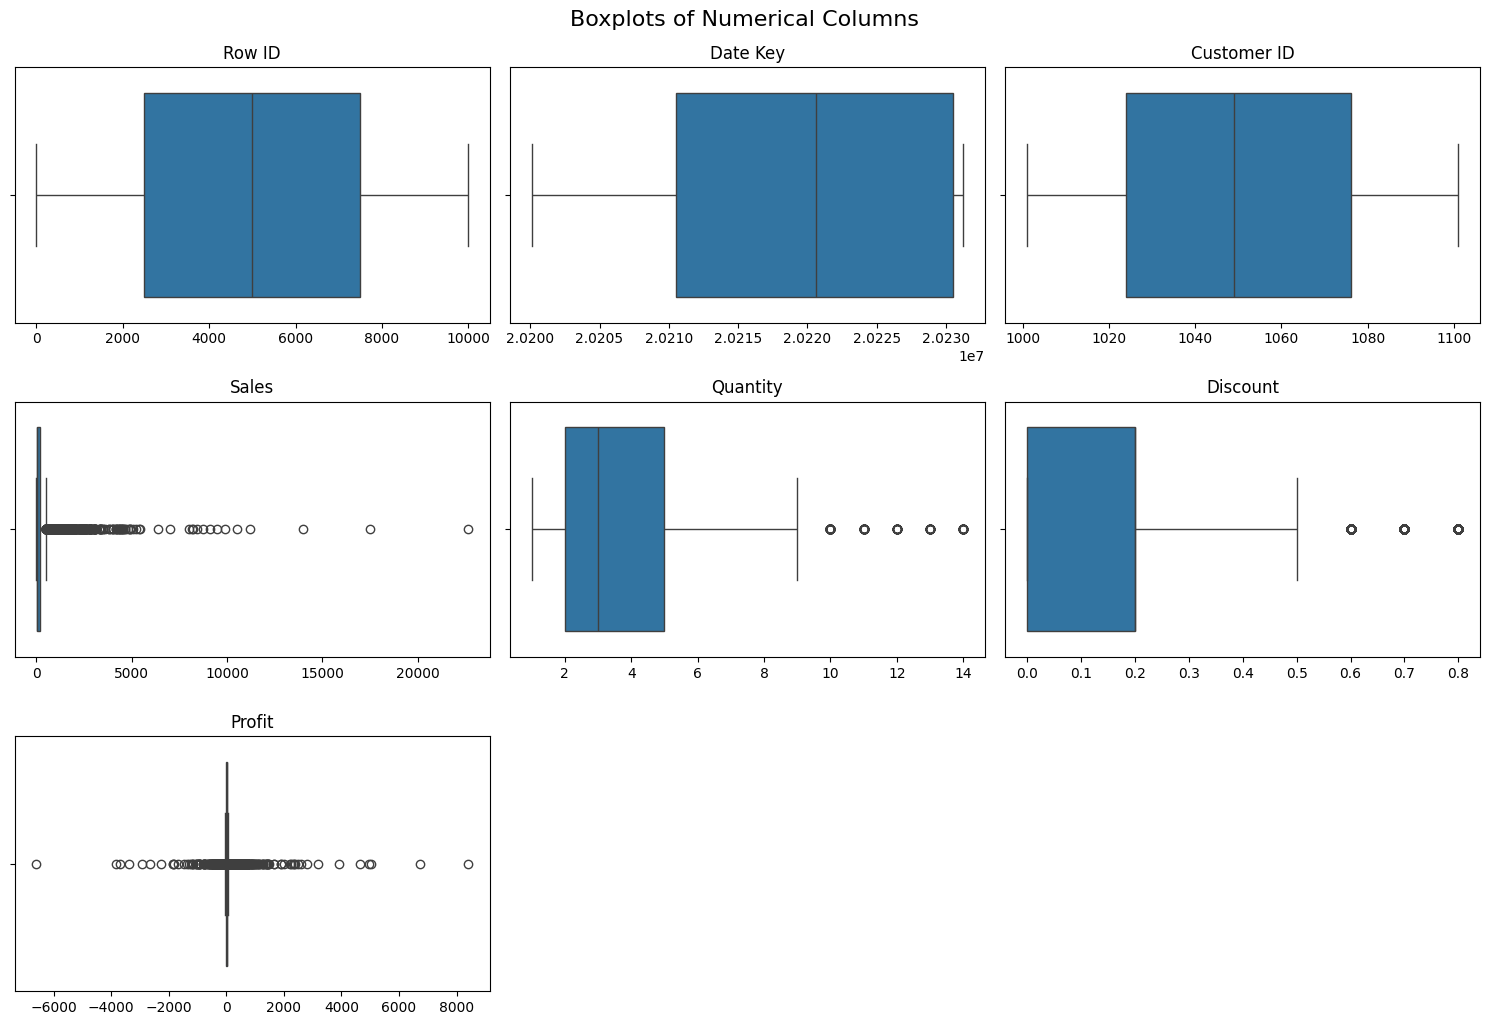

In [9]:
# Visual
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) // 3) + 1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'{col}')
    plt.xlabel('')
    plt.tight_layout()

plt.suptitle('Boxplots of Numerical Columns', fontsize=16, y=1.02)
plt.show()

In [10]:
# Outlier based on IQR
outliers_count = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers_count[col] = sum(outlier_indices)
    

# Total Outlier
for col in num_cols:
    count = len(df[col])
    print(f"Column '{col}':")
    print(f"  Total values: {count}")
    if col in outliers_count:
        outlier_count = outliers_count[col]
        print(f"  Outliers: {outlier_count}")


Column 'Row ID':
  Total values: 9994
  Outliers: 0
Column 'Date Key':
  Total values: 9994
  Outliers: 0
Column 'Customer ID':
  Total values: 9994
  Outliers: 0
Column 'Sales':
  Total values: 9994
  Outliers: 1167
Column 'Quantity':
  Total values: 9994
  Outliers: 170
Column 'Discount':
  Total values: 9994
  Outliers: 856
Column 'Profit':
  Total values: 9994
  Outliers: 1881


### Delete Outliers

In [11]:
# Function to eliminate outliers
def remove_outliers(df, num_cols):
    while True:
        outlier_indices = set()
        for col in num_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outlier_indices.update(outliers.index)

        # loop breaker
        if not outlier_indices:
            break

        # eliminate the shitty outliers
        df = df.drop(index=outlier_indices)

    return df.reset_index(drop=True)

In [12]:
# df_cleaned
df_cleaned = remove_outliers(df, num_cols)

# Verif
outliers_count_cleaned = {}
for col in num_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)
    outliers_count_cleaned[col] = sum(outlier_indices)


for col in num_cols:
    count = len(df_cleaned[col])
    outlier_count = outliers_count_cleaned.get(col, 0)
    print(f"Column '{col}':")
    print(f"  Total values: {count}")
    print(f"  Outliers: {outlier_count}") 


Column 'Row ID':
  Total values: 4115
  Outliers: 0
Column 'Date Key':
  Total values: 4115
  Outliers: 0
Column 'Customer ID':
  Total values: 4115
  Outliers: 0
Column 'Sales':
  Total values: 4115
  Outliers: 0
Column 'Quantity':
  Total values: 4115
  Outliers: 0
Column 'Discount':
  Total values: 4115
  Outliers: 0
Column 'Profit':
  Total values: 4115
  Outliers: 0


In [13]:
print("Df shape:", df.shape)
print("Cleaned Df shape:", df_cleaned.shape)

Df shape: (9994, 19)
Cleaned Df shape: (4115, 19)


## **3. *Univariate Analysis***

In [14]:
df_cleaned.sample(5)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
170,424,APJ-2023-125388,10/20/2023,20231020,Irene Duncan,South Korea,Seoul,APJ,APAC,Comcast,1022,Communications,Strategic,Marketing Suite - Gold,SMUE5DYYZZ,32.700,3,0.0,8.5020
2945,7063,EMEA-2022-157742,12/30/2022,20221230,Trevor Langdon,Belgium,Brussels,EMEA,EU-WEST,Target,1085,Retail,SMB,SaaS Connector Pack - Gold,WTCH3NW8IF,27.792,3,0.2,10.4220
162,404,EMEA-2020-155208,4/16/2020,20200416,Gordon Graham,Sweden,Stockholm,EMEA,NOR,Engie,1062,Energy,Strategic,ChatBot Plugin,V0X8WESW8Y,39.072,6,0.2,9.7680
4062,9868,EMEA-2021-116981,3/26/2021,20210326,Steven Henderson,United Kingdom,London,EMEA,UKIR,Sony,1028,Tech,Strategic,OneView,45CBA2JS9O,13.110,3,0.0,3.4086
540,1297,AMER-2023-115427,12/31/2023,20231231,Justin Walker,United States,Columbia,AMER,NAMER,Aviva,1006,Finance,Strategic,ContactMatcher,YIM32OGSAB,13.904,2,0.2,4.5188


In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        4115 non-null   int64  
 1   Order ID      4115 non-null   object 
 2   Order Date    4115 non-null   object 
 3   Date Key      4115 non-null   int64  
 4   Contact Name  4115 non-null   object 
 5   Country       4115 non-null   object 
 6   City          4115 non-null   object 
 7   Region        4115 non-null   object 
 8   Subregion     4115 non-null   object 
 9   Customer      4115 non-null   object 
 10  Customer ID   4115 non-null   int64  
 11  Industry      4115 non-null   object 
 12  Segment       4115 non-null   object 
 13  Product       4115 non-null   object 
 14  License       4115 non-null   object 
 15  Sales         4115 non-null   float64
 16  Quantity      4115 non-null   int64  
 17  Discount      4115 non-null   float64
 18  Profit        4115 non-null 

In [16]:
# Tentukan kolom yang ingin dihapus
columns_to_drop = ['Row ID', 'Order ID', 'Date Key', 'Contact Name', 
                   'City', 'Region', 'Subregion', 'Customer ID', 'License']

# Buat DataFrame baru df_analysis dengan kolom yang diinginkan
df_analysis = df_cleaned.drop(columns=columns_to_drop)

# Cek hasilnya
print(df_analysis.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  4115 non-null   object 
 1   Country     4115 non-null   object 
 2   Customer    4115 non-null   object 
 3   Industry    4115 non-null   object 
 4   Segment     4115 non-null   object 
 5   Product     4115 non-null   object 
 6   Sales       4115 non-null   float64
 7   Quantity    4115 non-null   int64  
 8   Discount    4115 non-null   float64
 9   Profit      4115 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 321.6+ KB
None


In [17]:
# Segment column based on datatype

num_cols = df_analysis.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df_analysis.select_dtypes(include=['object']).columns.tolist()

print("num:", num_cols)
print("cat:", cat_cols)


num: ['Sales', 'Quantity', 'Discount', 'Profit']
cat: ['Order Date', 'Country', 'Customer', 'Industry', 'Segment', 'Product']


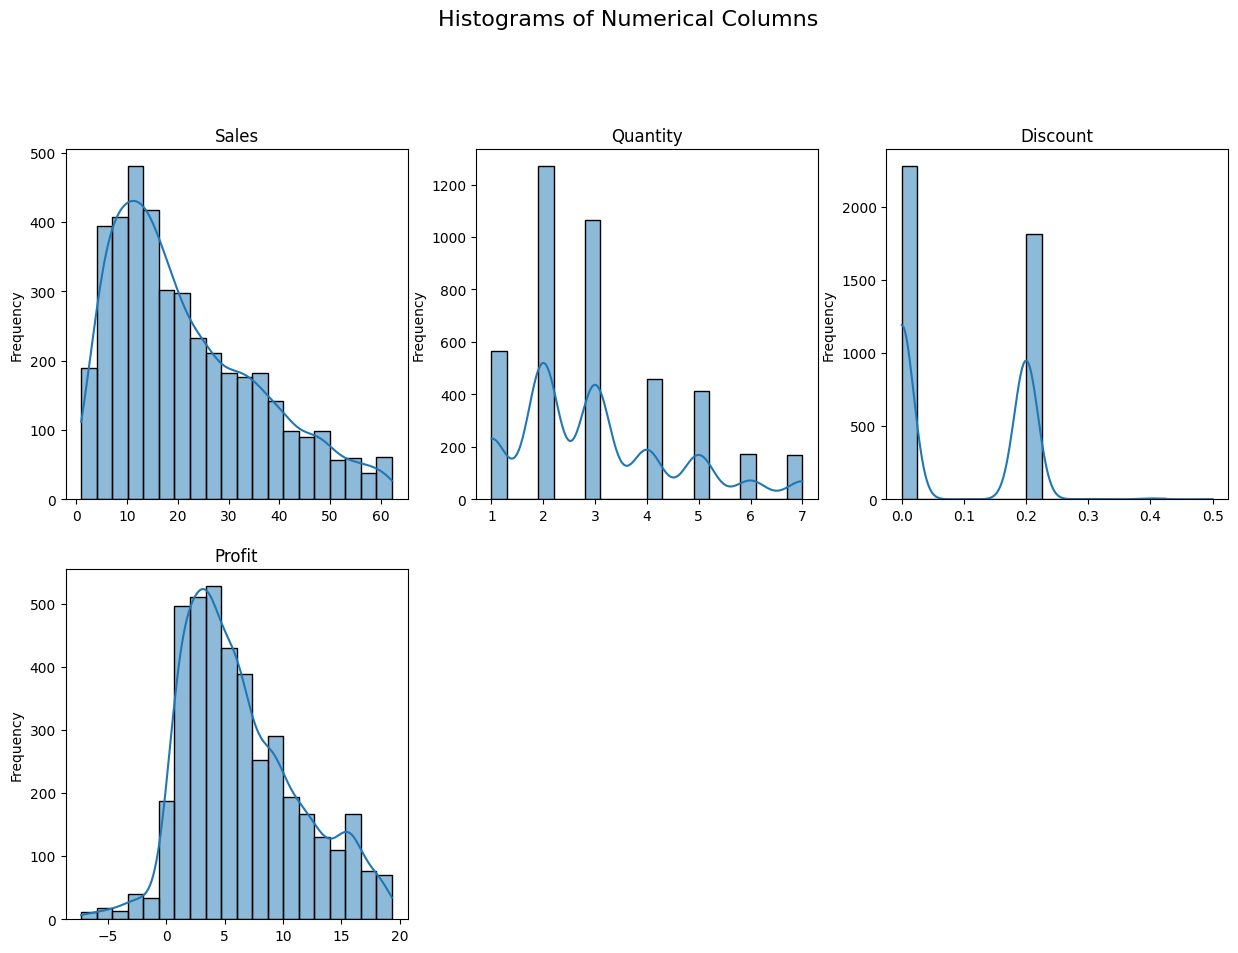

In [18]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 2) // 3, 3, i)
    sns.histplot(df_analysis[col], bins=20, kde=True)
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Frequency')


plt.suptitle('Histograms of Numerical Columns', fontsize=16, y=1.02)
plt.show()

- The histogram shows that most transactions have low to medium `sales` and `profit` values, with a `right skewed` distribution, indicating that there are only a few high-value transactions. `Quantity` is dominated by small amounts, particularly 1 and 3 units, while `discount` is generally low or absent, peaking around 0 and 0.

- This pattern indicates that the items sold are typically of low value, often purchased in small quantities, and rarely receive significant discounts.

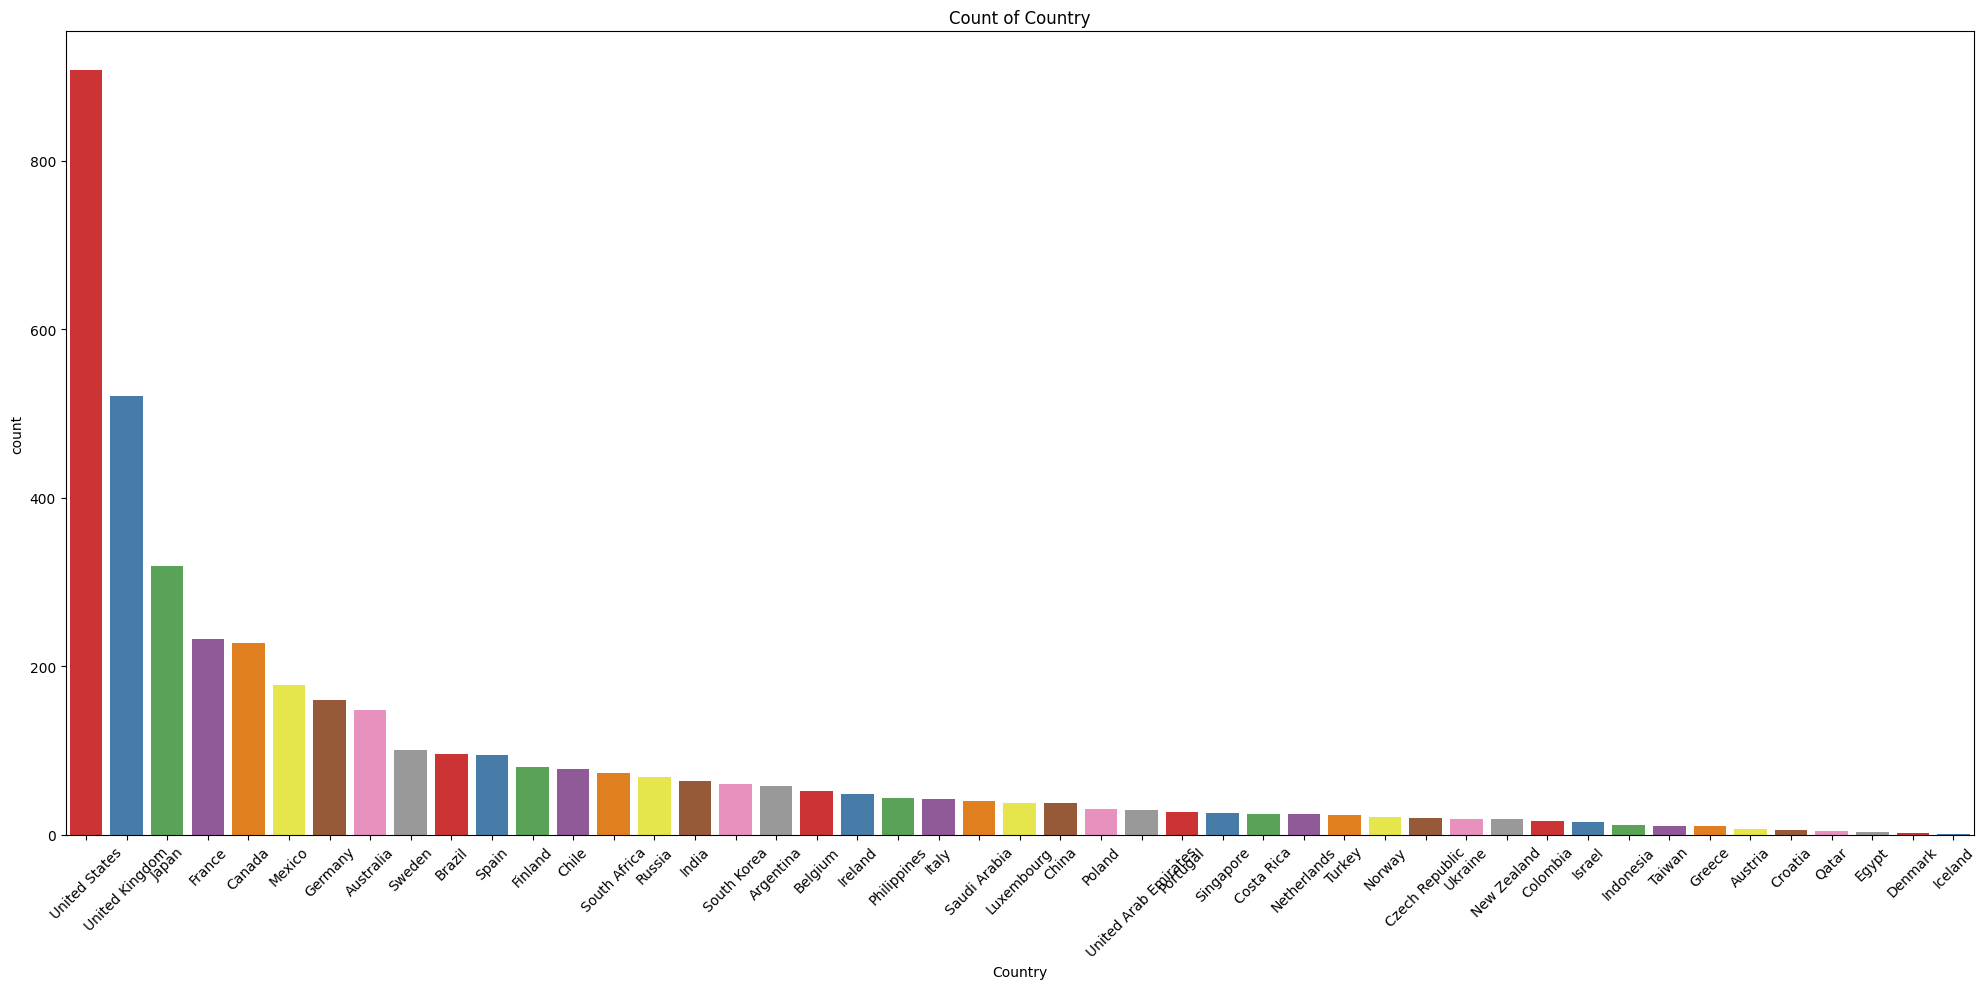

In [19]:
country_counts = df_analysis['Country'].value_counts()

plt.figure(figsize=(20, 10))

# Count plot
sns.countplot(x='Country', data=df_analysis, palette='Set1', order=country_counts.index)
plt.title('Count of Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

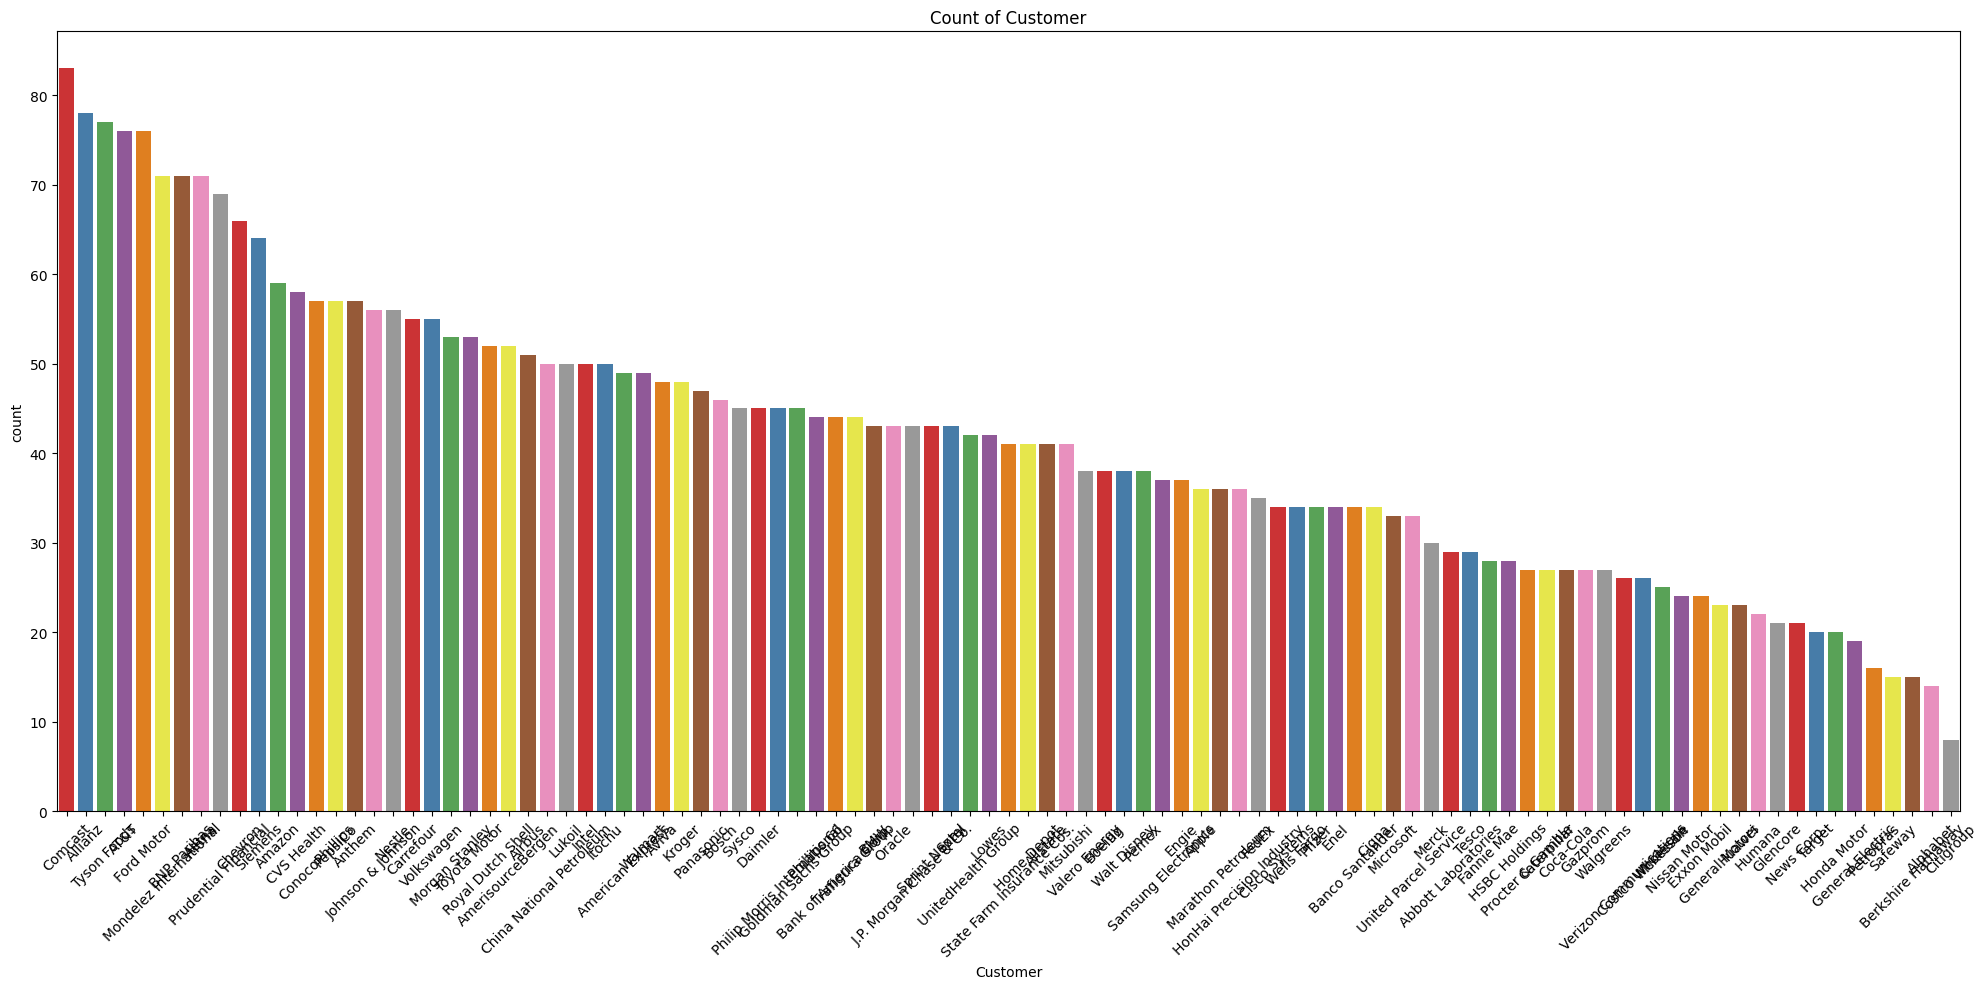

In [20]:
customer_counts = df_analysis['Customer'].value_counts()

plt.figure(figsize=(20, 10))

# Count plot customer
sns.countplot(x='Customer', data=df_analysis, palette='Set1', order=customer_counts.index)
plt.title('Count of Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


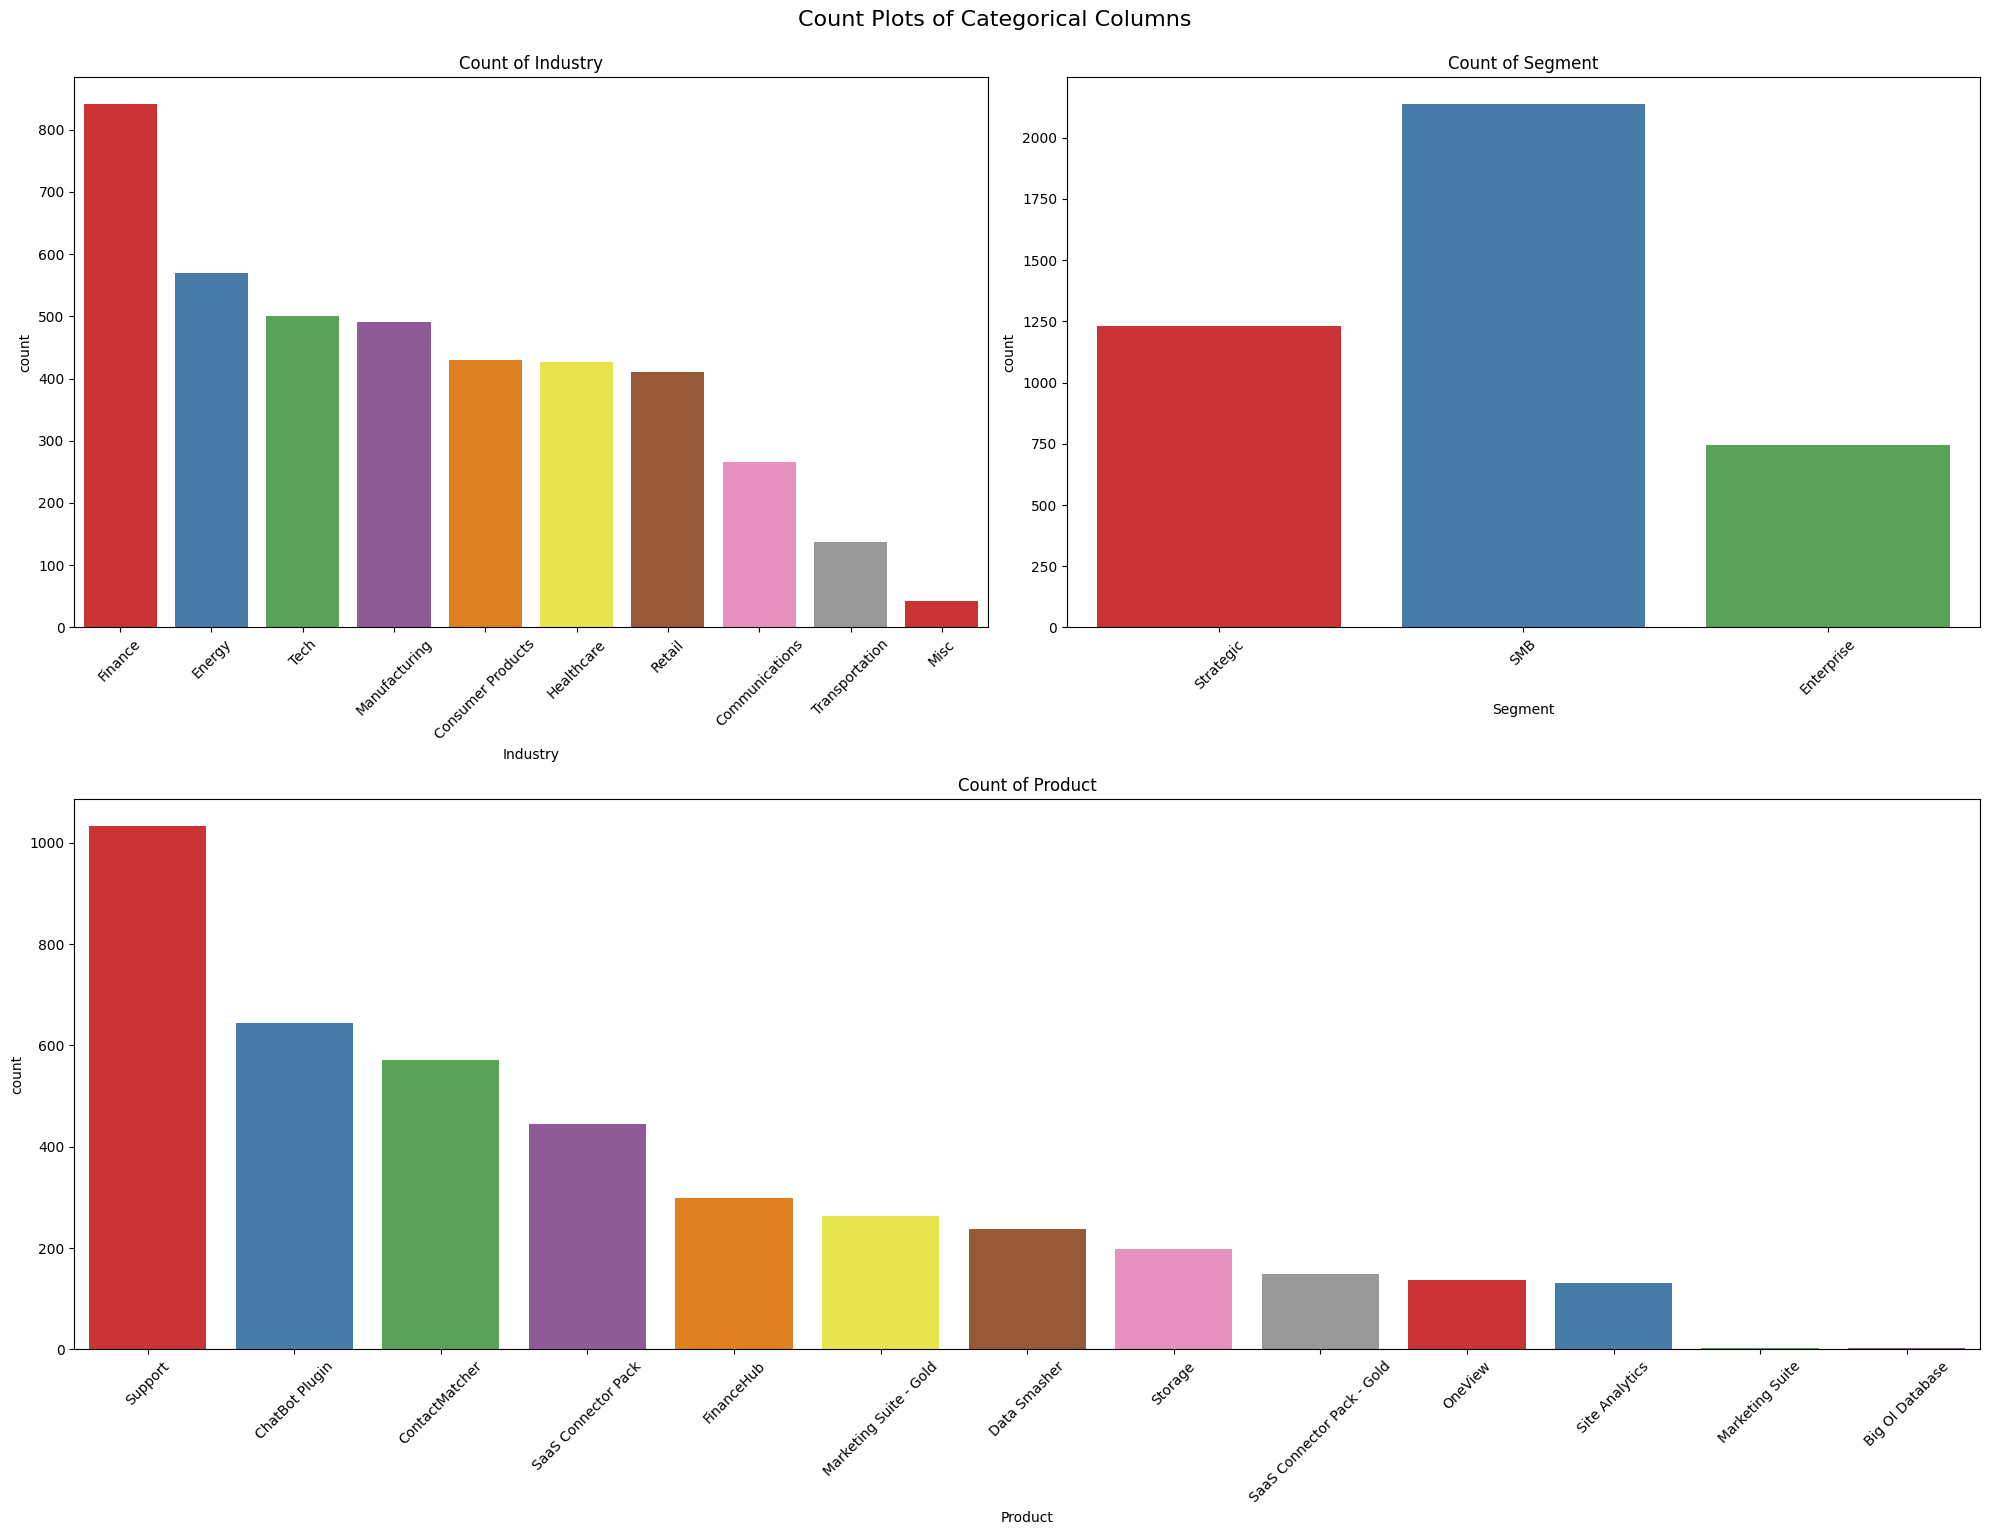

In [21]:
plt.figure(figsize=(20, 15))

# Count plot Industry
industry_counts = df_analysis['Industry'].value_counts()

plt.subplot(2, 2, 1)  # Baris 1, Kolom 1
sns.countplot(x='Industry', data=df_analysis, palette='Set1', order=industry_counts.index)
plt.title('Count of Industry')
plt.xticks(rotation=45)

# Count plot Segment
plt.subplot(2, 2, 2)
sns.countplot(x='Segment', data=df_analysis, palette='Set1')
plt.title('Count of Segment')
plt.xticks(rotation=45)

# Count plot Product
product_counts = df_analysis['Product'].value_counts()

plt.subplot(2, 1, 2) 
sns.countplot(x='Product', data=df_analysis, palette='Set1', order=product_counts.index)
plt.title('Count of Product')
plt.xticks(rotation=45)

# Atur layout dan judul keseluruhan
plt.tight_layout()
plt.suptitle('Count Plots of Categorical Columns', fontsize=16, y=1.02)

# Tampilkan plot
plt.show()


## **4. *Multivariate Analysis***

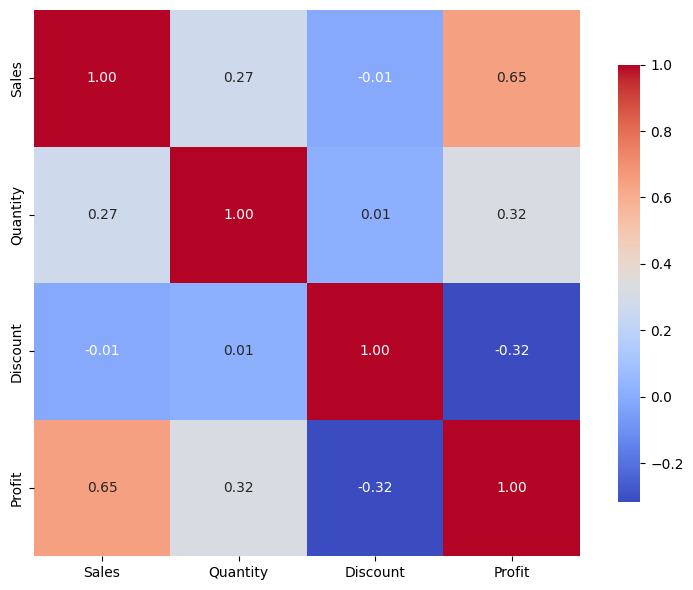

In [22]:
numeric_df = df_analysis.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.tight_layout()
plt.show()


- This correlation matrix shows that `Sales` and `Profit` have a strong positive correlation (0.65), indicating that an increase in sales tends to lead to an increase in profit.
- The correlation between `Quantity` and `Profit` is also positive but weaker (0.32), suggesting that the number of items sold has a slight impact on profit.
- Meanwhile, `Discount` has a negative correlation with `Profit` (-0.32), indicating that an increase in discounts tends to decrease profit.
- There is no significant correlation between `Discount` and `Sales`, meaning that discounts do not significantly affect overall sales volume.

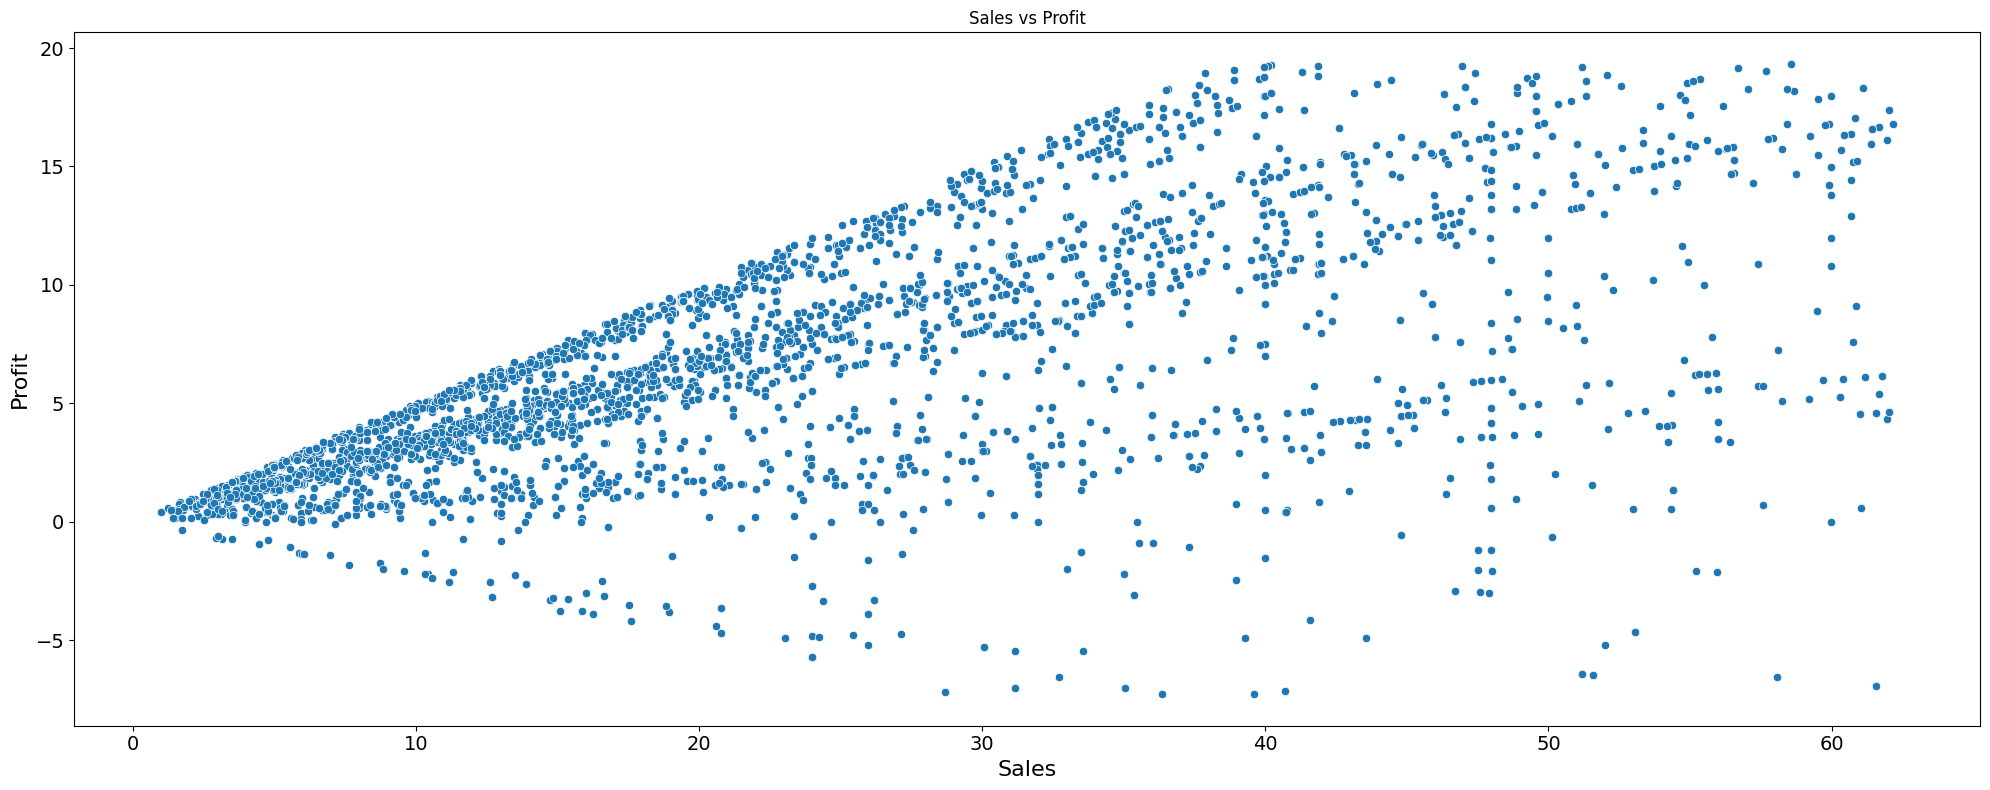

In [23]:
plt.figure(figsize=(20, 8))

# Sales vs Profit
plt.subplot(1, 1, 1)
sns.scatterplot(x='Sales', y='Profit', data=df_analysis)
plt.title('Sales vs Profit')
plt.xlabel('Sales', fontsize=16)
plt.ylabel('Profit', fontsize=16)
plt.tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.show()


## **5. *Advanced Analysis***

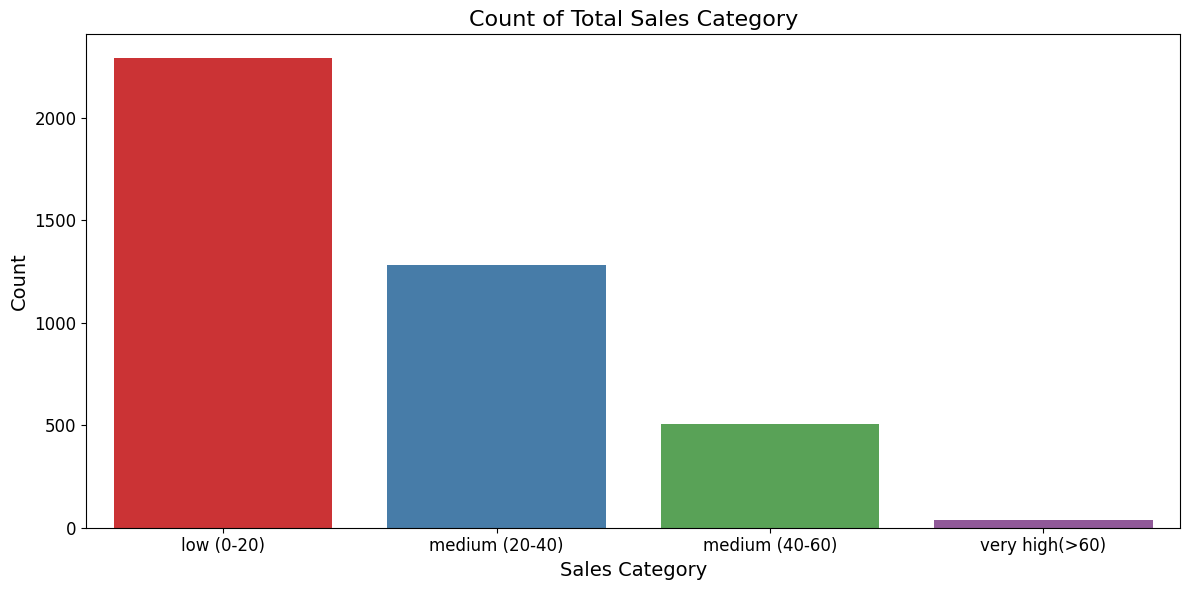

In [24]:
df_analysis2 = df_analysis.copy()

# Segmented
bins = [0, 20, 40, 60, float('inf')]  # interval
labels = ['low (0-20)', 'medium (20-40)', 'medium (40-60)', 'very high(>60)']

df_analysis2['sales_category'] = pd.cut(df_analysis2['Sales'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
sns.countplot(x='sales_category', data=df_analysis2, palette='Set1')
plt.title('Count of Total Sales Category', fontsize=16)
plt.xlabel('Sales Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()


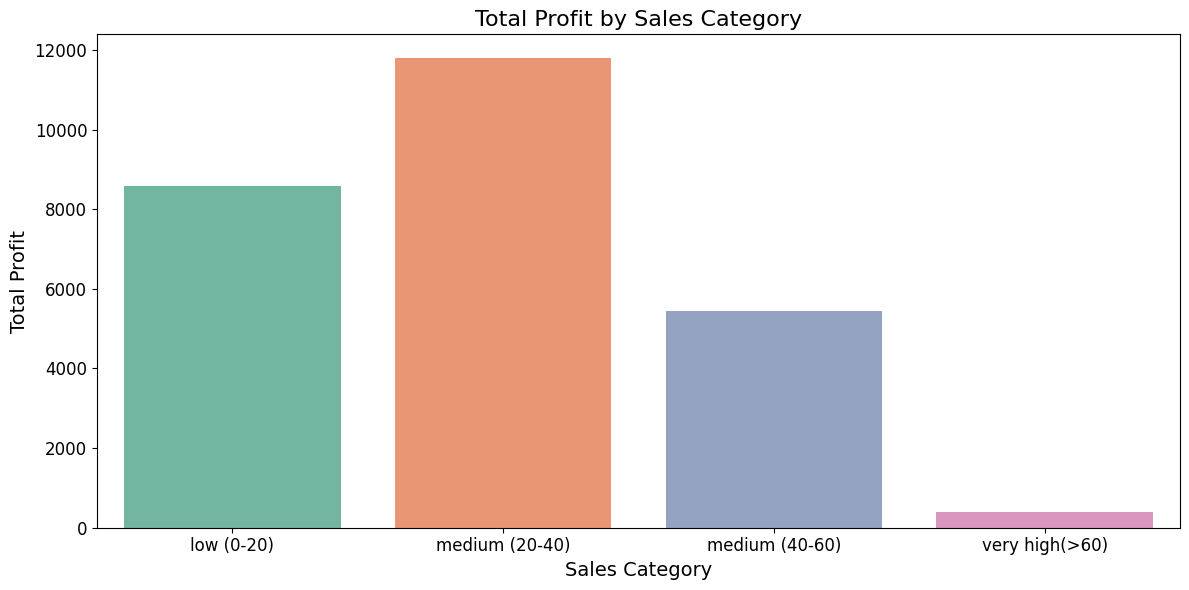

In [25]:
total_profit_per_category = df_analysis2.groupby('sales_category')['Profit'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='sales_category', y='Profit', data=total_profit_per_category, palette='Set2')
plt.title('Total Profit by Sales Category', fontsize=16)
plt.xlabel('Sales Category', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()


- The visual above shows that the sales category "medium" contributes the most to total profit. Thus, products in the "medium" range, despite having lower sales quantity compared to the "low" category, are able to generate the highest profit.

In [26]:
import matplotlib.pyplot as plt

df_analysis3 = df_analysis2.copy()

df_analysis3['Order Date'] = pd.to_datetime(df_analysis3['Order Date'])
df_analysis3.set_index('Order Date', inplace=True)

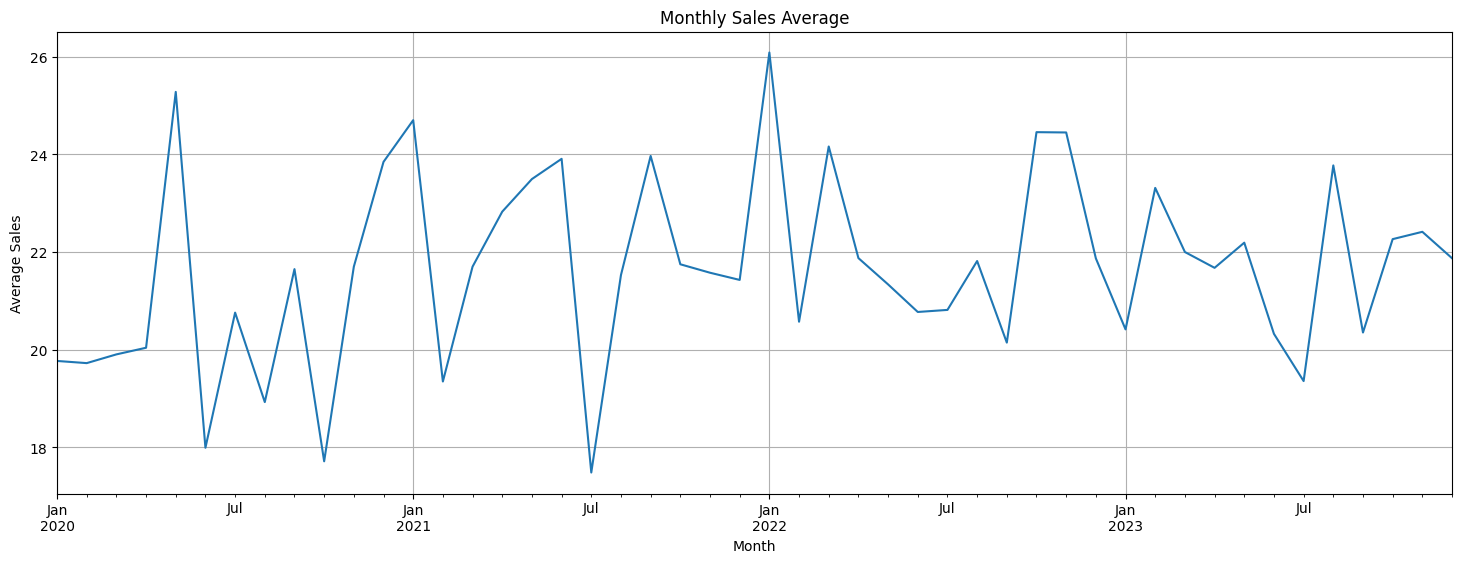

In [27]:
# Average Sales
monthly_average_sales = df_analysis3.resample('M')['Sales'].mean()
plt.figure(figsize=(18, 6))
monthly_average_sales.plot(title='Monthly Sales Average', ylabel='Average Sales', xlabel='Month', grid=True)
plt.show()


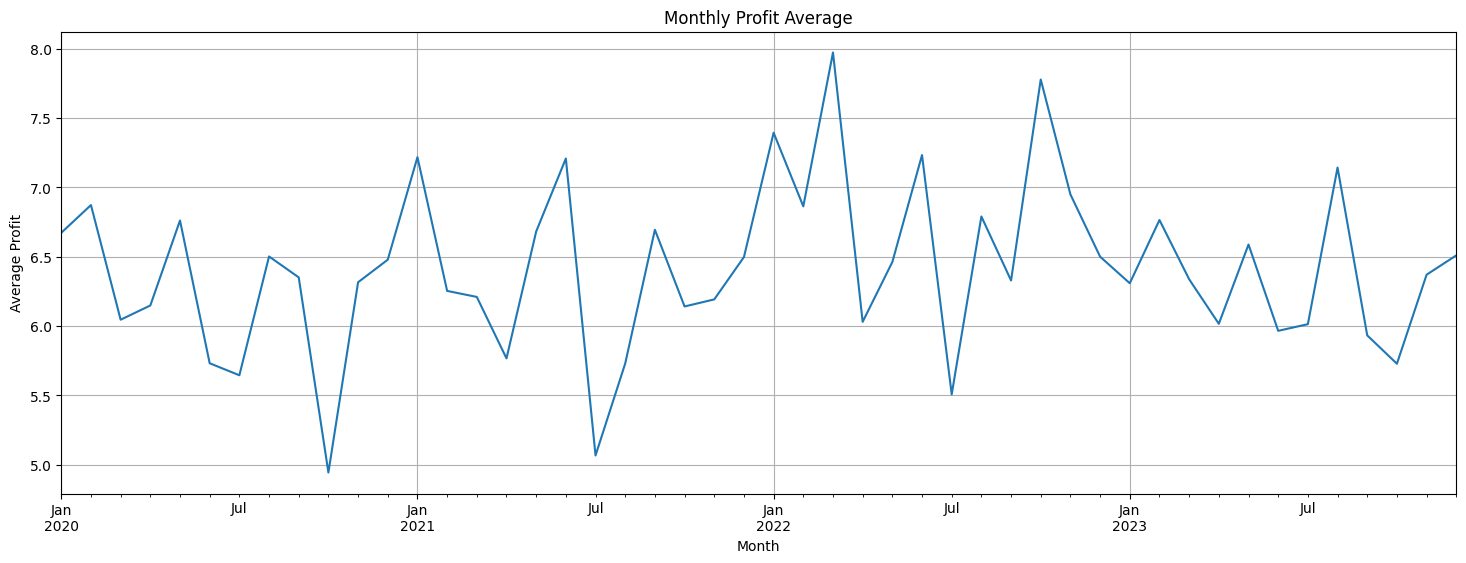

In [28]:
# Average Sales
monthly_average_profit = df_analysis3.resample('M')['Profit'].mean()
plt.figure(figsize=(18, 6))
monthly_average_profit.plot(title='Monthly Profit Average', ylabel='Average Profit', xlabel='Month', grid=True)
plt.show()


In [29]:
sales_change_rate = monthly_average_sales.pct_change() * 100 
profit_change_rate = monthly_average_profit.pct_change() * 100 

# Table
comparison_table = pd.DataFrame({
    'Sales Avg': monthly_average_sales,
    'Profit Avg': monthly_average_profit,
    'Sales Rate change (%)': sales_change_rate,
    'Profit Rate change (%)': profit_change_rate
})

# decimal limit
comparison_table = comparison_table.round(1)

comparison_table


,Sales Avg,Profit Avg,Sales Rate change (%),Profit Rate change (%)
Order Date,,,,
2020-01-31,19.8,6.7,NaN,NaN
2020-02-29,19.7,6.9,-0.2,3.0
2020-03-31,19.9,6.0,0.9,-12.0
2020-04-30,20.0,6.1,0.7,1.7
2020-05-31,25.3,6.8,26.1,10.0
2020-06-30,18.0,5.7,-28.8,-15.2
2020-07-31,20.8,5.6,15.4,-1.5
2020-08-31,18.9,6.5,-8.8,15.2
2020-09-30,21.7,6.4,14.4,-2.3


Based on Sales AVG and Profit AVG, the top 3 month for sales product is:

1. **March 2022:**
   - Sales Avg: 24.2
   - Profit Avg: 8.0
   - Sales Rate Change: 17.4%
   - Profit Rate Change: 16.2%

2. **October 2022:**
   - Sales Avg: 24.5
   - Profit Avg: 7.8
   - Sales Rate Change: 21.4%
   - Profit Rate Change: 22.9%

3. **January 2022:**
   - Sales Avg: 26.1
   - Profit Avg: 7.4
   - Sales Rate Change: 21.7%
   - Profit Rate Change: 13.8%

In [30]:
df_analysis4 = df_analysis2.copy()
df_analysis4['Order Date'] = pd.to_datetime(df_analysis4['Order Date'])

march_2022_data = df_analysis4[(df_analysis4['Order Date'].dt.month == 3) & (df_analysis4['Order Date'].dt.year == 2022)]
october_2022_data = df_analysis4[(df_analysis4['Order Date'].dt.month == 10) & (df_analysis4['Order Date'].dt.year == 2022)]
january_2022_data = df_analysis4[(df_analysis4['Order Date'].dt.month == 1) & (df_analysis4['Order Date'].dt.year == 2022)]


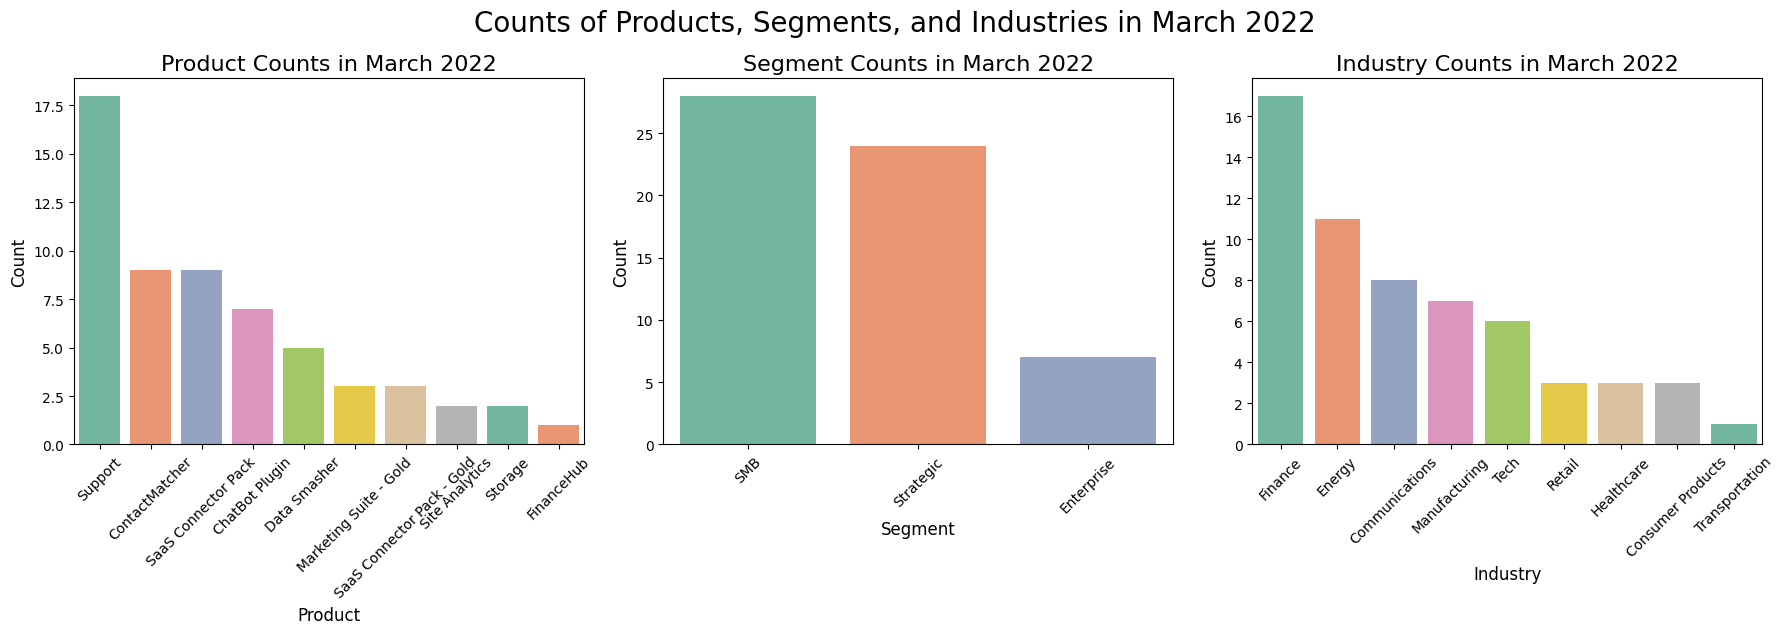

In [31]:

plt.figure(figsize=(18, 6))

# Product Counts
product_counts = march_2022_data['Product'].value_counts()
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
sns.barplot(x=product_counts.index, y=product_counts.values, palette='Set2')
plt.title('Product Counts in March 2022', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Segment Counts
segment_counts = march_2022_data['Segment'].value_counts()
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='Set2')
plt.title('Segment Counts in March 2022', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Industry Counts
industry_counts = march_2022_data['Industry'].value_counts()
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='Set2')
plt.title('Industry Counts in March 2022', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Counts of Products, Segments, and Industries in March 2022', fontsize=20, y=1.05)
plt.show()

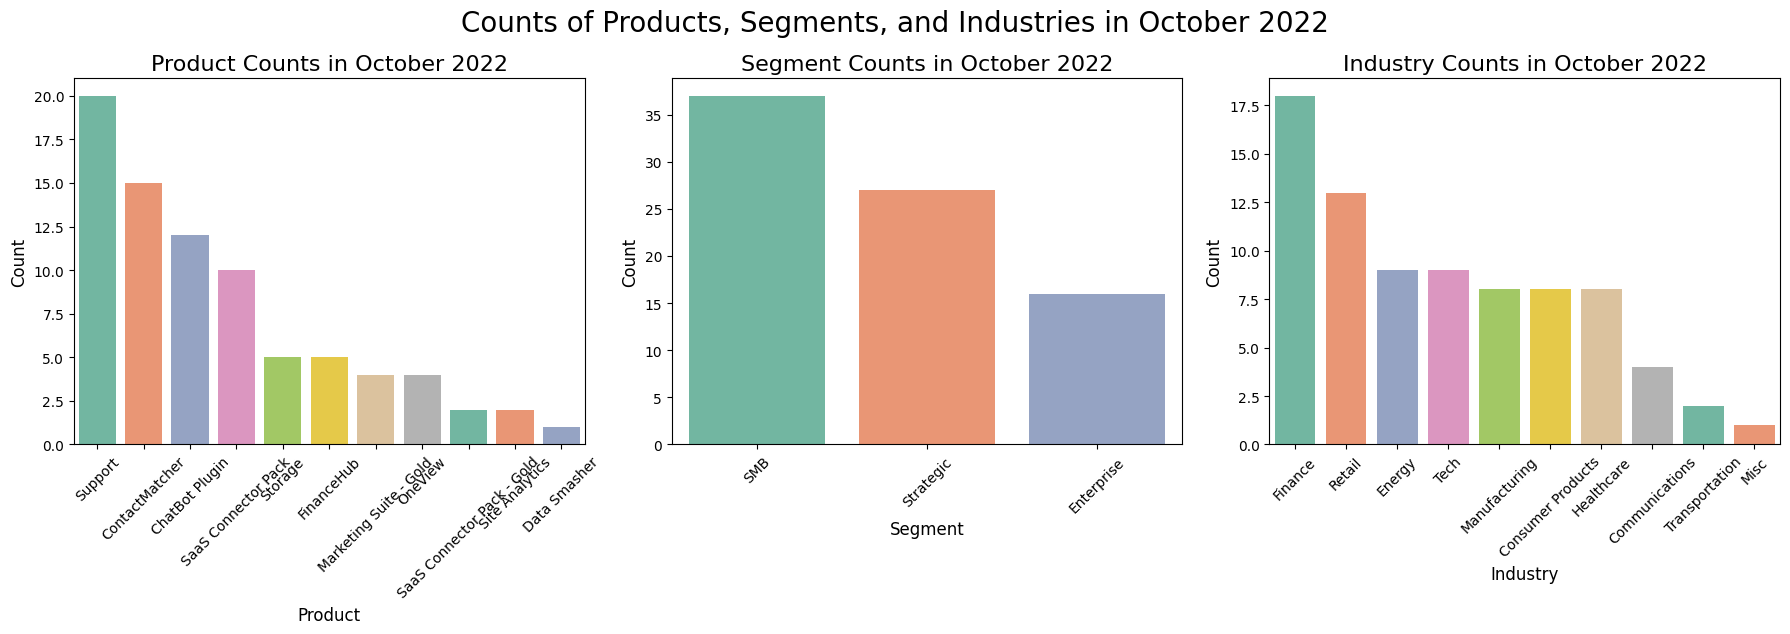

In [32]:
# October 2022
plt.figure(figsize=(18, 6)) 

# Product Counts for October 2022
product_counts_oct = october_2022_data['Product'].value_counts()
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
sns.barplot(x=product_counts_oct.index, y=product_counts_oct.values, palette='Set2')
plt.title('Product Counts in October 2022', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Segment Counts for October 2022
segment_counts_oct = october_2022_data['Segment'].value_counts()
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
sns.barplot(x=segment_counts_oct.index, y=segment_counts_oct.values, palette='Set2')
plt.title('Segment Counts in October 2022', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Industry Counts for October 2022
industry_counts_oct = october_2022_data['Industry'].value_counts()
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
sns.barplot(x=industry_counts_oct.index, y=industry_counts_oct.values, palette='Set2')
plt.title('Industry Counts in October 2022', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Counts of Products, Segments, and Industries in October 2022', fontsize=20, y=1.05)
plt.show()


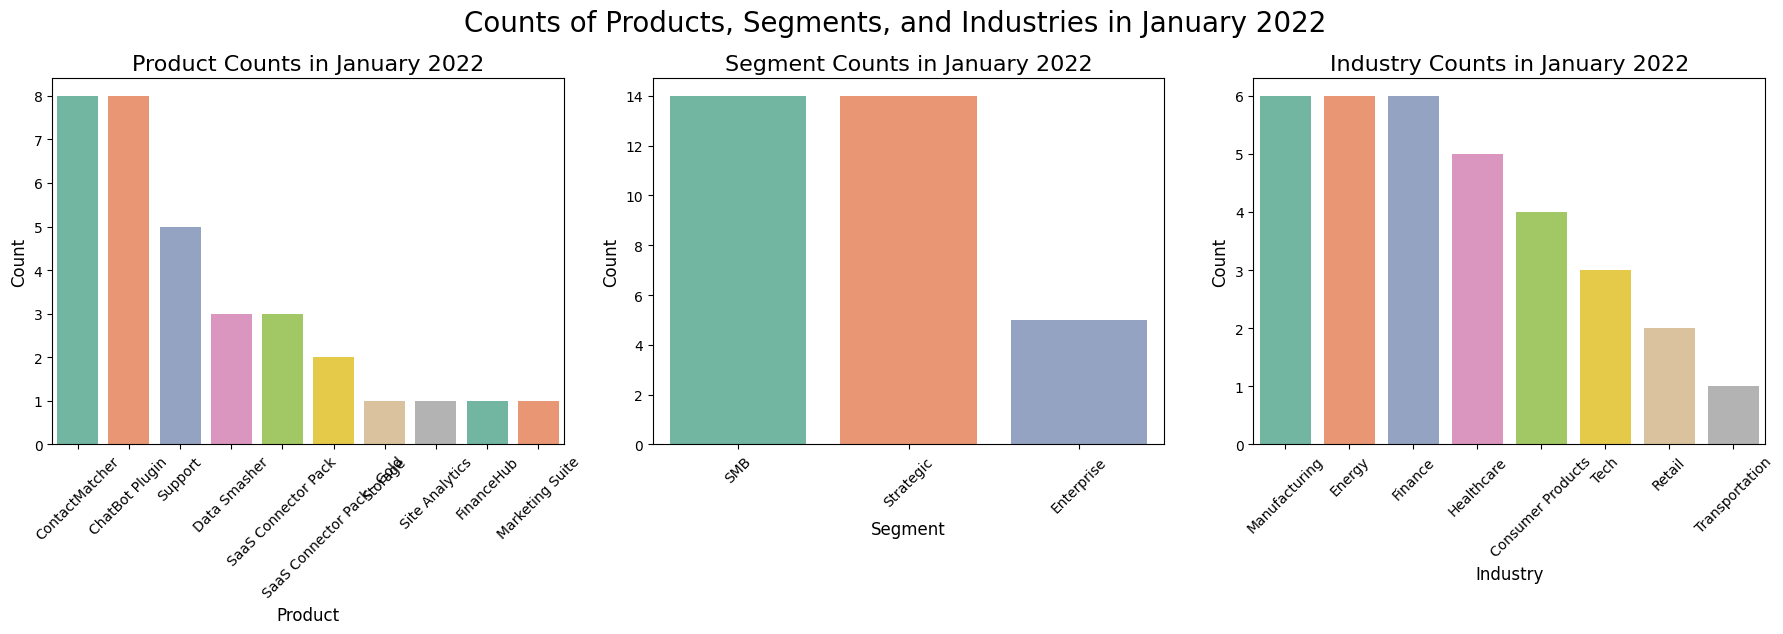

In [33]:
plt.figure(figsize=(18, 6))

product_counts_jan = january_2022_data['Product'].value_counts()
plt.subplot(1, 3, 1)
sns.barplot(x=product_counts_jan.index, y=product_counts_jan.values, palette='Set2')
plt.title('Product Counts in January 2022', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

segment_counts_jan = january_2022_data['Segment'].value_counts()
plt.subplot(1, 3, 2)
sns.barplot(x=segment_counts_jan.index, y=segment_counts_jan.values, palette='Set2')
plt.title('Segment Counts in January 2022', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

industry_counts_jan = january_2022_data['Industry'].value_counts()
plt.subplot(1, 3, 3)
sns.barplot(x=industry_counts_jan.index, y=industry_counts_jan.values, palette='Set2')
plt.title('Industry Counts in January 2022', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Counts of Products, Segments, and Industries in January 2022', fontsize=20, y=1.05)
plt.show()


### Summary of Insights

**Product Counts**:
- In January 2022, "Consulting" had the highest count, followed by "Software" and "Data Services."
- In March 2022, "Software" led, with "Consulting" and "Data Services" following, indicating growth from January.
- By October 2022, "Software" remained dominant, showing consistent popularity for these three products.

**Segment Counts**:
- Across all months, "SMB" and "Strategic" segments were higher than "Enterprise," with "SMB" consistently the largest. This indicates a primary focus on small-to-medium businesses and strategic clients.

**Industry Counts**:
- "Finance" and "Energy" led consistently, indicating strong demand, with "Healthcare" and "Manufacturing" also stable but lower in count. "Transportation" had consistently low numbers.

**Changes Over Time**:
- From January to March, there was an increase in counts for some categories like "Software" and "Finance."
- From March to October, counts remained stable, suggesting steady demand across these segments and industries.

### Month-Specific Recommendations

- **January**: Focus on selling Software, Consulting, and Data Services, targeting SMB, Strategic segments, and Finance and Energy industries.
- **March**: Leverage high demand for Software and Consulting, and explore new products or promotions for smaller industries.
- **October**: Continue focusing on dominant products like Software, with possible additional promotions for supporting products or services in established industries.

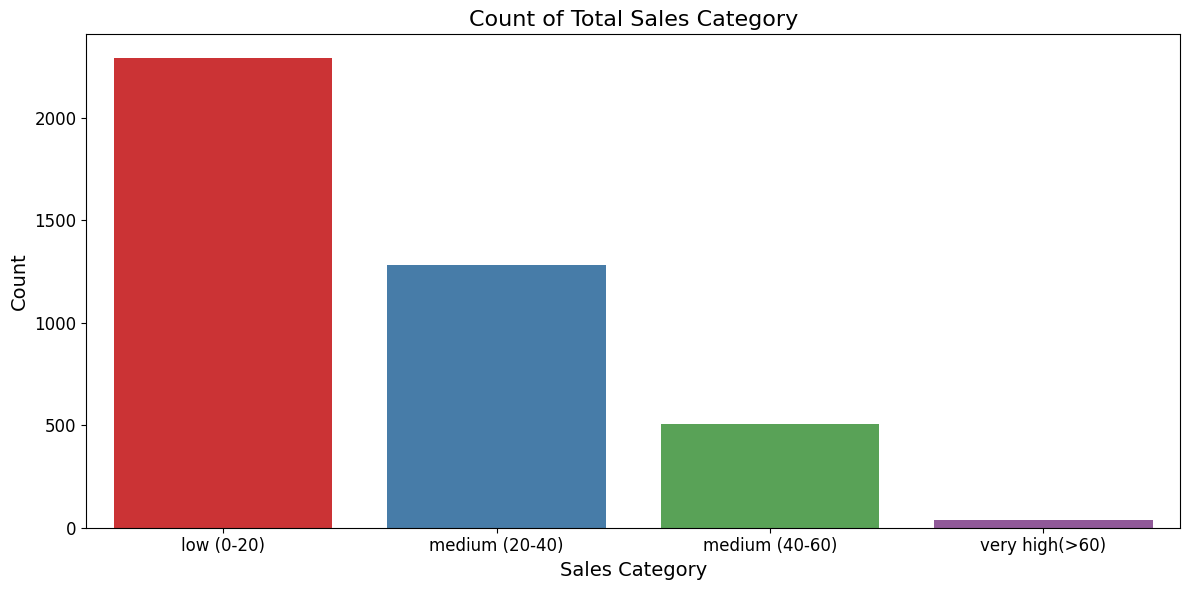

In [34]:
df_analysis2 = df_analysis.copy()

# Segmented
bins = [0, 20, 40, 60, float('inf')]  # interval
labels = ['low (0-20)', 'medium (20-40)', 'medium (40-60)', 'very high(>60)']

df_analysis2['sales_category'] = pd.cut(df_analysis2['Sales'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
sns.countplot(x='sales_category', data=df_analysis2, palette='Set1')
plt.title('Count of Total Sales Category', fontsize=16)
plt.xlabel('Sales Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()


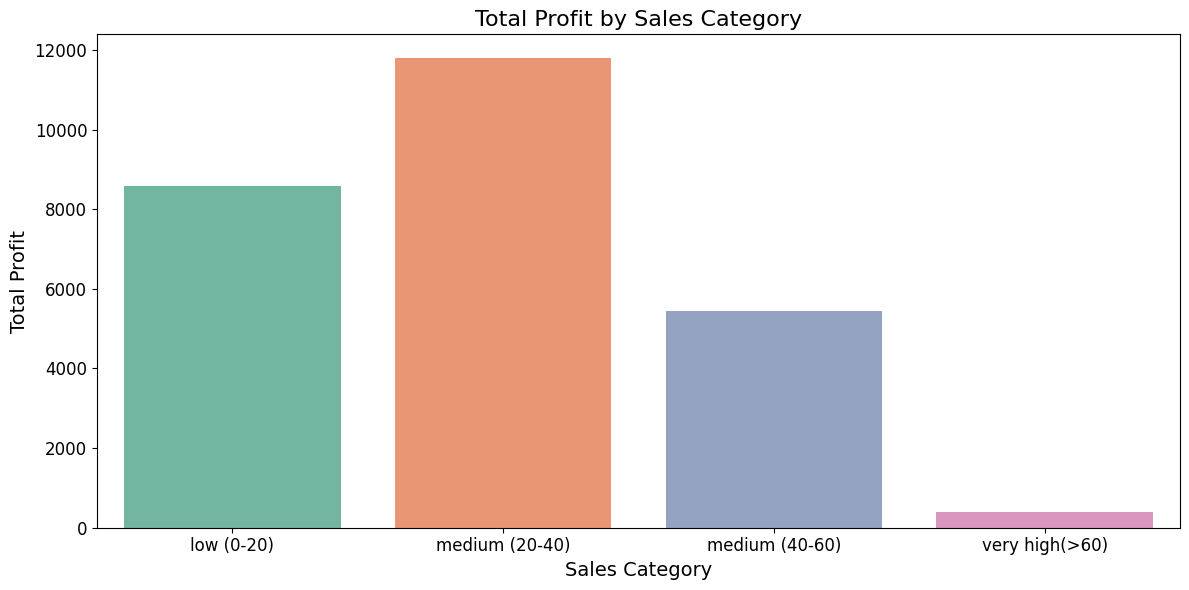

In [35]:
total_profit_per_category = df_analysis2.groupby('sales_category')['Profit'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='sales_category', y='Profit', data=total_profit_per_category, palette='Set2')
plt.title('Total Profit by Sales Category', fontsize=16)
plt.xlabel('Sales Category', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()


- The visual above shows that the sales category "medium" contributes the most to total profit. Thus, products in the "medium" range, despite having lower sales quantity compared to the "low" category, are able to generate the highest profit.

In [36]:
import matplotlib.pyplot as plt

df_analysis3 = df_analysis2.copy()

df_analysis3['Order Date'] = pd.to_datetime(df_analysis3['Order Date'])
df_analysis3.set_index('Order Date', inplace=True)

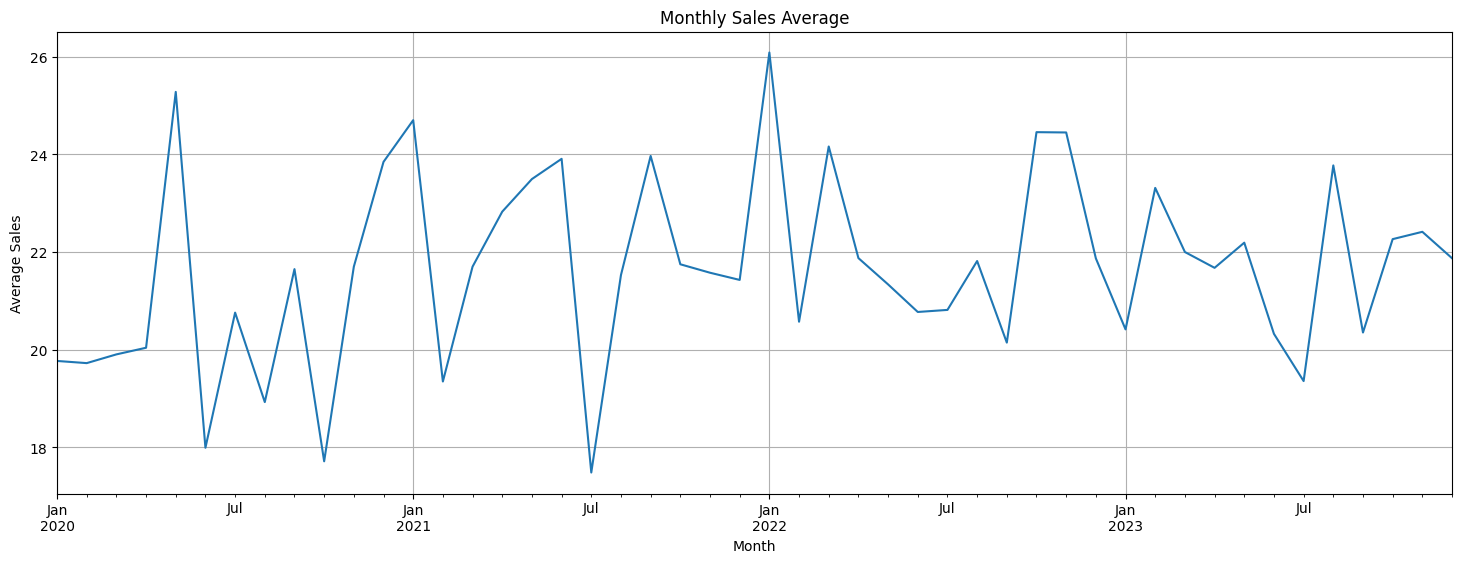

In [37]:
# Average Sales
monthly_average_sales = df_analysis3.resample('M')['Sales'].mean()
plt.figure(figsize=(18, 6))
monthly_average_sales.plot(title='Monthly Sales Average', ylabel='Average Sales', xlabel='Month', grid=True)
plt.show()


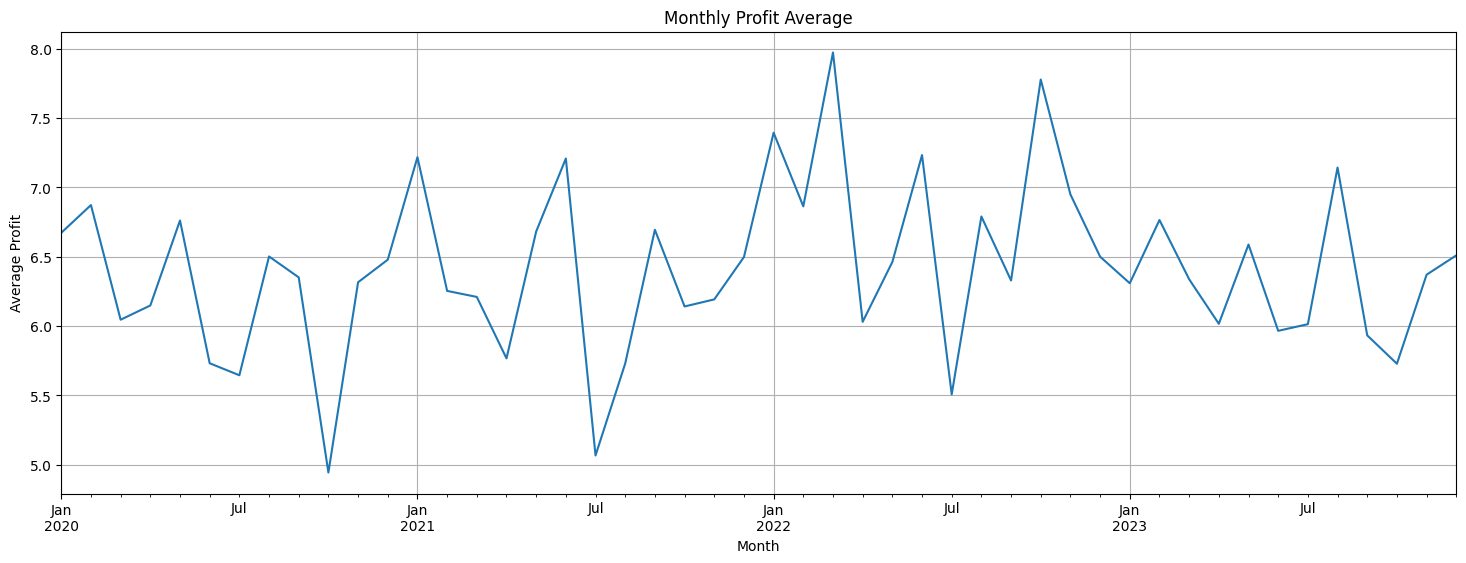

In [38]:
# Average Sales
monthly_average_profit = df_analysis3.resample('M')['Profit'].mean()
plt.figure(figsize=(18, 6))
monthly_average_profit.plot(title='Monthly Profit Average', ylabel='Average Profit', xlabel='Month', grid=True)
plt.show()


In [39]:
sales_change_rate = monthly_average_sales.pct_change() * 100 
profit_change_rate = monthly_average_profit.pct_change() * 100 

# Table
comparison_table = pd.DataFrame({
    'Sales Avg': monthly_average_sales,
    'Profit Avg': monthly_average_profit,
    'Sales Rate change (%)': sales_change_rate,
    'Profit Rate change (%)': profit_change_rate
})

# decimal limit
comparison_table = comparison_table.round(1)

comparison_table


,Sales Avg,Profit Avg,Sales Rate change (%),Profit Rate change (%)
Order Date,,,,
2020-01-31,19.8,6.7,NaN,NaN
2020-02-29,19.7,6.9,-0.2,3.0
2020-03-31,19.9,6.0,0.9,-12.0
2020-04-30,20.0,6.1,0.7,1.7
2020-05-31,25.3,6.8,26.1,10.0
2020-06-30,18.0,5.7,-28.8,-15.2
2020-07-31,20.8,5.6,15.4,-1.5
2020-08-31,18.9,6.5,-8.8,15.2
2020-09-30,21.7,6.4,14.4,-2.3


Based on Sales AVG and Profit AVG, the top 3 month for sales product is:

1. **March 2022:**
   - Sales Avg: 24.2
   - Profit Avg: 8.0
   - Sales Rate Change: 17.4%
   - Profit Rate Change: 16.2%

2. **October 2022:**
   - Sales Avg: 24.5
   - Profit Avg: 7.8
   - Sales Rate Change: 21.4%
   - Profit Rate Change: 22.9%

3. **January 2022:**
   - Sales Avg: 26.1
   - Profit Avg: 7.4
   - Sales Rate Change: 21.7%
   - Profit Rate Change: 13.8%

In [40]:
df_analysis4 = df_analysis2.copy()
df_analysis4['Order Date'] = pd.to_datetime(df_analysis4['Order Date'])

march_2022_data = df_analysis4[(df_analysis4['Order Date'].dt.month == 3) & (df_analysis4['Order Date'].dt.year == 2022)]
october_2022_data = df_analysis4[(df_analysis4['Order Date'].dt.month == 10) & (df_analysis4['Order Date'].dt.year == 2022)]
january_2022_data = df_analysis4[(df_analysis4['Order Date'].dt.month == 1) & (df_analysis4['Order Date'].dt.year == 2022)]


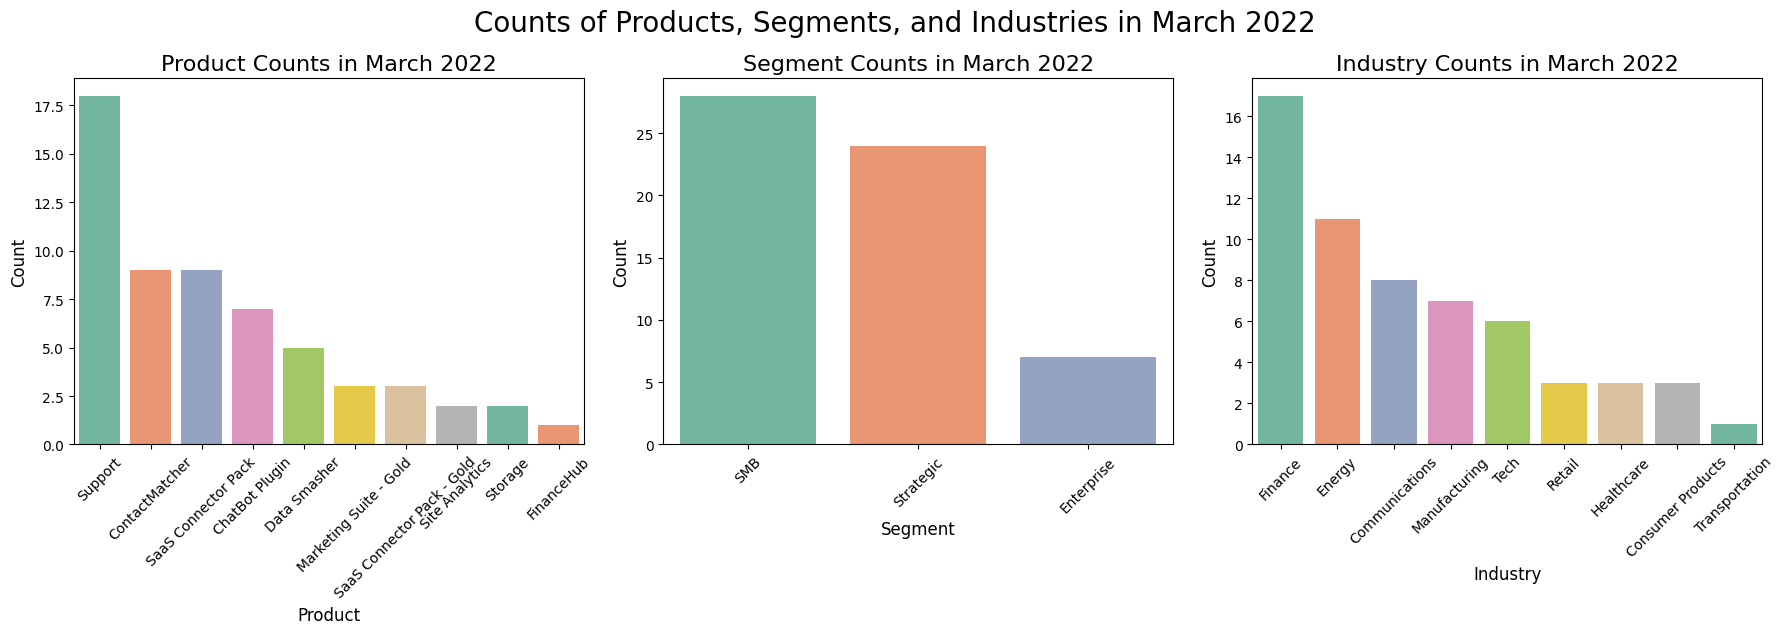

In [41]:

plt.figure(figsize=(18, 6))

# Product Counts
product_counts = march_2022_data['Product'].value_counts()
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
sns.barplot(x=product_counts.index, y=product_counts.values, palette='Set2')
plt.title('Product Counts in March 2022', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Segment Counts
segment_counts = march_2022_data['Segment'].value_counts()
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='Set2')
plt.title('Segment Counts in March 2022', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Industry Counts
industry_counts = march_2022_data['Industry'].value_counts()
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='Set2')
plt.title('Industry Counts in March 2022', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Counts of Products, Segments, and Industries in March 2022', fontsize=20, y=1.05)
plt.show()

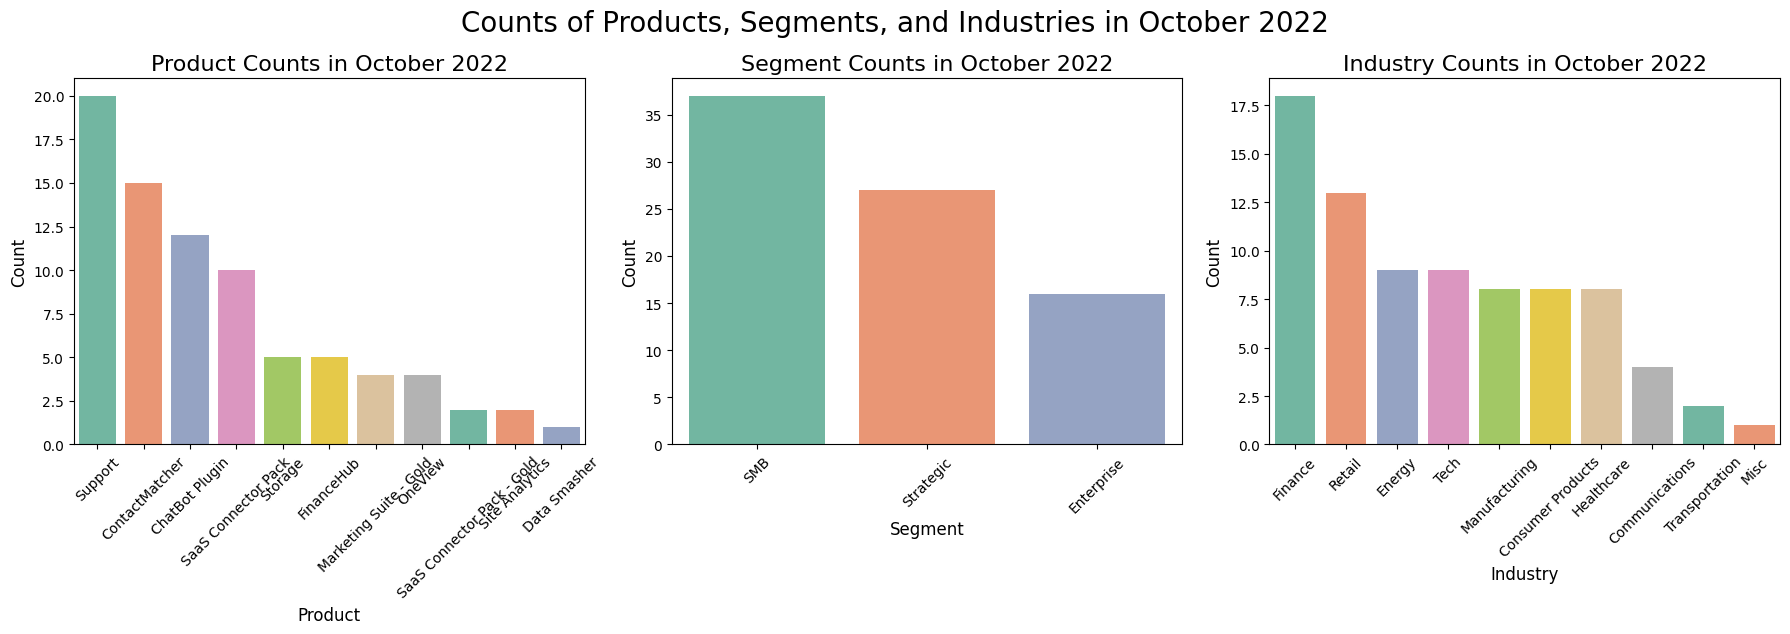

In [42]:
# October 2022
plt.figure(figsize=(18, 6)) 

# Product Counts for October 2022
product_counts_oct = october_2022_data['Product'].value_counts()
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
sns.barplot(x=product_counts_oct.index, y=product_counts_oct.values, palette='Set2')
plt.title('Product Counts in October 2022', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Segment Counts for October 2022
segment_counts_oct = october_2022_data['Segment'].value_counts()
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
sns.barplot(x=segment_counts_oct.index, y=segment_counts_oct.values, palette='Set2')
plt.title('Segment Counts in October 2022', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Industry Counts for October 2022
industry_counts_oct = october_2022_data['Industry'].value_counts()
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
sns.barplot(x=industry_counts_oct.index, y=industry_counts_oct.values, palette='Set2')
plt.title('Industry Counts in October 2022', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Counts of Products, Segments, and Industries in October 2022', fontsize=20, y=1.05)
plt.show()


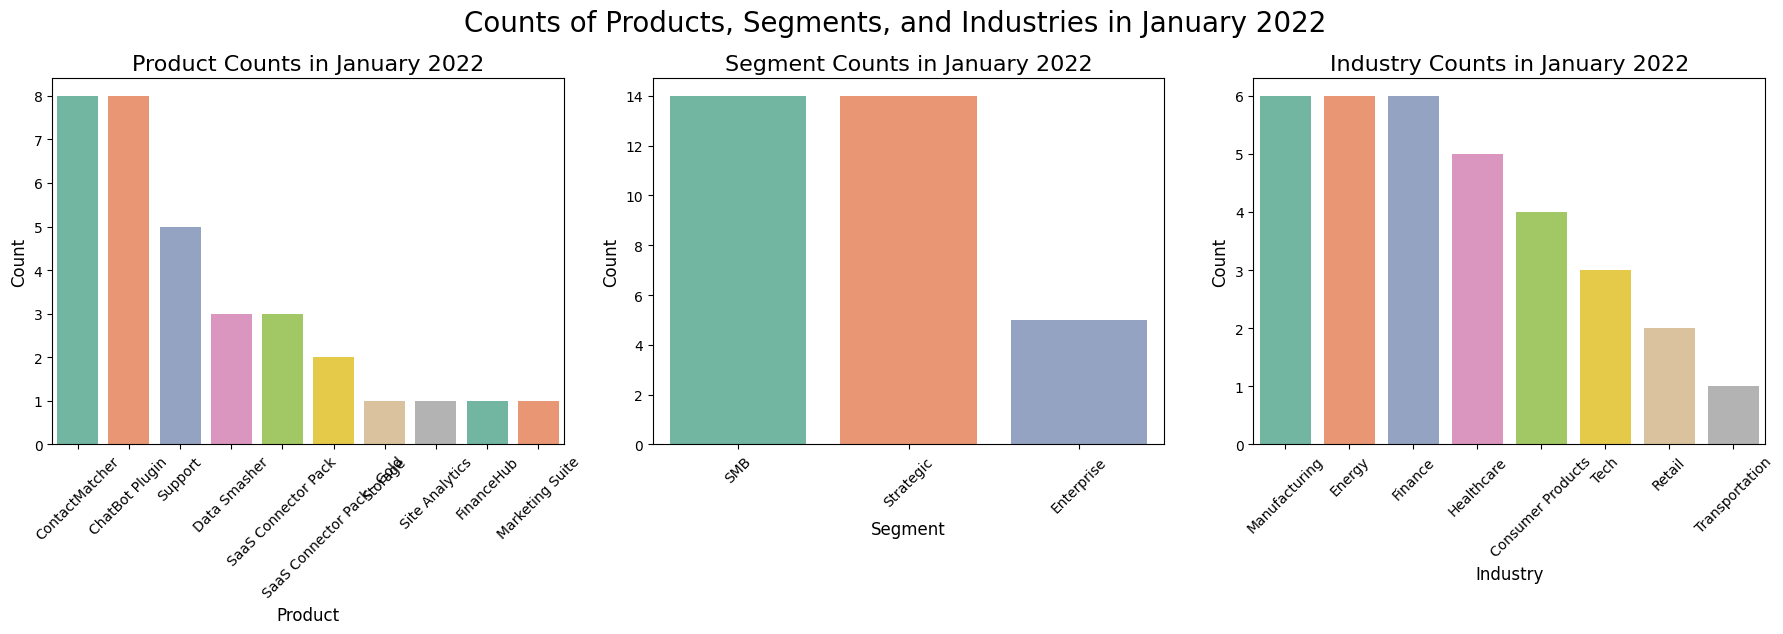

In [43]:
plt.figure(figsize=(18, 6))

product_counts_jan = january_2022_data['Product'].value_counts()
plt.subplot(1, 3, 1)
sns.barplot(x=product_counts_jan.index, y=product_counts_jan.values, palette='Set2')
plt.title('Product Counts in January 2022', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

segment_counts_jan = january_2022_data['Segment'].value_counts()
plt.subplot(1, 3, 2)
sns.barplot(x=segment_counts_jan.index, y=segment_counts_jan.values, palette='Set2')
plt.title('Segment Counts in January 2022', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

industry_counts_jan = january_2022_data['Industry'].value_counts()
plt.subplot(1, 3, 3)
sns.barplot(x=industry_counts_jan.index, y=industry_counts_jan.values, palette='Set2')
plt.title('Industry Counts in January 2022', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Counts of Products, Segments, and Industries in January 2022', fontsize=20, y=1.05)
plt.show()


## **6. *Business Recommendation***

### Summary of Insights

**Product Counts**:
- In January 2022, "Consulting" had the highest count, followed by "Software" and "Data Services."
- In March 2022, "Software" led, with "Consulting" and "Data Services" following, indicating growth from January.
- By October 2022, "Software" remained dominant, showing consistent popularity for these three products.

**Segment Counts**:
- Across all months, "SMB" and "Strategic" segments were higher than "Enterprise," with "SMB" consistently the largest. This indicates a primary focus on small-to-medium businesses and strategic clients.

**Industry Counts**:
- "Finance" and "Energy" led consistently, indicating strong demand, with "Healthcare" and "Manufacturing" also stable but lower in count. "Transportation" had consistently low numbers.

**Changes Over Time**:
- From January to March, there was an increase in counts for some categories like "Software" and "Finance."
- From March to October, counts remained stable, suggesting steady demand across these segments and industries.

### Month-Specific Recommendations

- **January**: Focus on selling Software, Consulting, and Data Services, targeting SMB, Strategic segments, and Finance and Energy industries.
- **March**: Leverage high demand for Software and Consulting, and explore new products or promotions for smaller industries.
- **October**: Continue focusing on dominant products like Software, with possible additional promotions for supporting products or services in established industries.

## **7. *Import Dataframe into CSV for Tableau***

In [44]:
df_cleaned.to_csv('df_cleaned.csv', index=False)